In [2]:
# packages
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

In [40]:
# reading in data from file
df = pd.read_csv("./data/01_24_20_0932.csv", index_col=0)

In [41]:
# splitting dataframe
n = len(df)
step = 30

data_1 = df[:step]
data_2 = df[step:step*2]
data_3 = df[step*2:]

ls = [data_1, data_2, data_3]

# for data in ls:
#     display(data)
#     break
    
display(data_1.sort_values(by=["beta"], axis=0, ascending=False))
# display(data_1.sort_values(by=["shareOutstanding"], axis=0, ascending=True))

,beta,volume_10_day,c,o,adx,signal,trending,shareOutstanding,bearish,bullish
GRWG,3.12335,3.63656,49.84,48.1600,74.077543,buy,True,36.88,0.0000,1.0000
SQ,2.58165,9.14422,222.88,219.0000,42.632426,buy,True,432.80,0.0000,1.0000
CGC,2.36008,1.68735,33.80,33.1500,35.418618,strong buy,True,350.11,0.5000,0.5000
AMD,2.19114,50.01342,92.79,94.4200,43.169276,buy,True,1170.00,0.2500,0.7500
CRON,2.16141,1.19001,10.65,10.6000,33.009145,buy,True,348.82,0.5000,0.5000
TSLA,2.11570,43.80479,846.64,834.3100,56.341688,buy,True,905.00,0.1539,0.8461
ROKU,1.95563,5.58816,422.85,422.0000,54.301020,buy,True,119.90,0.0000,1.0000
DFS,1.76691,2.78908,92.27,93.5600,39.802654,buy,True,307.00,0.0000,1.0000
SHAK,1.73000,1.08799,111.21,107.2600,47.741585,strong buy,True,37.56,0.5000,0.5000
PLUG,1.71386,77.23934,66.87,62.3000,59.676549,strong buy,True,303.38,0.2500,0.7500


In [ ]:
# stocks we're interested in getting options data
option_stocks = data_1.sort_values(by=["beta"], axis=0, ascending=False)

for index, row in option_stocks.iterrows():
    # display stock name
    stock = index
    
    # initialize pandas dataframes for each expir. date
    op_interest = pd.DataFrame()
    
    # get current price of stock
    price = row['c']

    
    # get options dates
    s = yf.Ticker(str(index))
    try:
        dates = list(s.options)
    except:
        continue
    
    # get options data for first two dates
    for date in dates[:2]:
        # get call options chain
        call_chain = s.option_chain(date)[0]
        
        for index, row in call_chain.iterrows():
            # get strike price
            strike = row['strike']

            # get put options chain
#             put_chain = s.option_chain(date)[1]
            
            # check if true value of option is less than $1200
            if abs(price-strike) < 2.5:
                vol = row["impliedVolatility"]
                if float(vol) > .65:
                    op_interest = op_interest.append(row, ignore_index=True)
    
    drop_list = ["ask", "bid", "contractSize", "currency", "inTheMoney", "lastTradeDate"]
    try:
        op_interest = op_interest.drop(drop_list, axis=1)
    except:
        pass
    
    if op_interest.empty:
        pass
#         print("No options of interest for " + str(stock) + " today.")
    else:
        display(stock)
        display(price)
        cols = ["contractSymbol", "lastPrice", "strike", "change", "impliedVolatility", "percentChange", "volume", "openInterest"]
        op_interest = op_interest[cols]
        display(op_interest)

'GRWG'

49.84

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,GRWG210129C00047500,3.15,47.5,-0.30,0.877931,-8.695651,25.0,56.0
1,GRWG210129C00048000,2.75,48.0,-0.45,0.883790,-14.062502,72.0,47.0
2,GRWG210129C00048500,3.05,48.5,0.49,0.893556,19.140627,25.0,100.0
3,GRWG210129C00049000,2.74,49.0,0.27,0.884767,10.931173,155.0,194.0
4,GRWG210129C00050000,2.26,50.0,0.20,0.893067,9.708740,329.0,1123.0
5,GRWG210129C00051000,1.86,51.0,0.16,0.903321,9.411762,205.0,754.0
6,GRWG210129C00051500,1.66,51.5,0.13,0.910157,8.496732,42.0,147.0
7,GRWG210129C00052000,1.50,52.0,0.10,0.918946,7.142859,313.0,193.0
8,GRWG210205C00047500,4.32,47.5,0.37,0.887208,9.367092,4.0,39.0
9,GRWG210205C00048000,4.10,48.0,0.25,0.889650,6.493506,8.0,40.0


'CGC'

33.8

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,CGC210129C00031500,2.51,31.5,-0.69,0.743167,-21.562502,4.0,93.0
1,CGC210129C00032500,1.68,32.5,-0.19,0.681644,-10.160431,22.0,72.0
2,CGC210129C00033000,1.48,33.0,-0.17,0.689456,-10.303028,102.0,200.0
3,CGC210129C00033500,1.28,33.5,-0.07,0.673831,-5.185189,333.0,243.0
4,CGC210129C00034000,1.06,34.0,-0.12,0.667972,-10.169493,426.0,475.0
5,CGC210129C00035000,0.73,35.0,-0.08,0.710940,-9.876541,764.0,969.0
6,CGC210129C00036000,0.50,36.0,-0.06,0.710940,-10.714286,306.0,466.0
7,CGC210205C00031500,3.05,31.5,0.00,0.677249,0.000000,2.0,119.0
8,CGC210205C00032000,2.50,32.0,-0.20,0.702640,-7.407409,3.0,224.0
9,CGC210205C00032500,2.30,32.5,-0.40,0.650394,-14.814817,10.0,218.0


'AMD'

92.79

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,AMD210129C00090500,5.10,90.5,0.50,0.832033,10.869566,1537.0,2159.0
1,AMD210129C00091000,4.88,91.0,0.47,0.833498,10.657602,2212.0,4307.0
2,AMD210129C00091500,4.65,91.5,0.45,0.827150,10.714294,1271.0,3982.0
3,AMD210129C00092000,4.30,92.0,0.40,0.834474,10.256412,8658.0,8386.0
4,AMD210129C00092500,4.20,92.5,0.45,0.845216,11.999995,2852.0,2348.0
5,AMD210129C00093000,3.95,93.0,0.40,0.853517,11.267609,10163.0,4522.0
6,AMD210129C00093500,3.75,93.5,0.40,0.854738,11.940302,3209.0,934.0
7,AMD210129C00094000,3.55,94.0,0.34,0.864259,10.591897,6623.0,3419.0
8,AMD210129C00094500,3.40,94.5,0.35,0.872072,11.475415,1464.0,906.0
9,AMD210129C00095000,3.22,95.0,0.34,0.877931,11.805552,24766.0,15689.0


'CRON'

10.65

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,CRON210129C00008500,2.56,8.5,0.00,1.218754,0.000000,17.0,253.0
1,CRON210129C00009000,1.72,9.0,-0.11,0.859376,-6.010930,24.0,264.0
2,CRON210129C00009500,1.23,9.5,-0.18,0.750003,-12.765954,3.0,168.0
3,CRON210129C00010000,0.79,10.0,-0.21,0.730471,-20.999998,41.0,534.0
4,CRON210129C00010500,0.50,10.5,-0.19,0.750003,-27.536232,197.0,503.0
5,CRON210129C00011000,0.30,11.0,-0.12,0.781252,-28.571424,771.0,732.0
6,CRON210129C00011500,0.16,11.5,-0.10,0.824221,-38.461536,417.0,1096.0
7,CRON210129C00012000,0.11,12.0,-0.05,0.910157,-31.250000,226.0,1479.0
8,CRON210129C00012500,0.06,12.5,-0.06,0.960938,-50.000000,24.0,646.0
9,CRON210129C00013000,0.04,13.0,-0.05,1.031255,-55.555557,13.0,250.0


'TSLA'

846.64

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,TSLA210129C00845000,36.99,845.0,-2.509998,0.827272,-6.354426,6628.0,1771.0
1,TSLA210129C00847500,35.95,847.5,-2.250000,0.762576,-5.890052,111.0,NaN
2,TSLA210205C00845000,50.45,845.0,-1.549999,0.776034,-2.980768,464.0,506.0
3,TSLA210205C00847500,49.50,847.5,-1.169998,0.709689,-2.309055,48.0,NaN


'PLUG'

66.87

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,PLUG210129C00065000,5.20,65.0,1.20,1.246586,29.999996,3638.0,2884.0
1,PLUG210129C00066000,4.70,66.0,0.90,1.229984,23.684206,1739.0,822.0
2,PLUG210129C00067000,4.20,67.0,0.87,1.254398,26.126122,1611.0,962.0
3,PLUG210129C00068000,3.80,68.0,0.73,1.252933,23.778503,1101.0,749.0
4,PLUG210129C00069000,3.37,69.0,0.77,1.240726,29.615385,1012.0,286.0
5,PLUG210205C00065000,6.80,65.0,1.20,1.169194,21.428577,631.0,894.0
6,PLUG210205C00066000,6.35,66.0,1.05,1.172856,19.811314,689.0,349.0
7,PLUG210205C00067000,5.80,67.0,0.80,1.176030,16.000004,153.0,244.0
8,PLUG210205C00068000,5.25,68.0,0.65,1.178715,14.130438,372.0,521.0
9,PLUG210205C00069000,4.80,69.0,0.75,1.176518,18.518518,164.0,121.0


'SNAP'

53.57

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,SNAP210129C00051500,2.93,51.5,-0.72,0.673831,-19.726028,164.0,1479.0
1,SNAP210129C00052000,2.75,52.0,-0.55,0.654300,-16.666666,909.0,9819.0
2,SNAP210129C00052500,2.43,52.5,-0.47,0.652347,-16.206896,291.0,1534.0
3,SNAP210129C00053500,1.82,53.5,-0.56,0.650394,-23.529413,1588.0,2292.0
4,SNAP210129C00054000,1.60,54.0,-0.52,0.660648,-24.528296,3268.0,1818.0
5,SNAP210129C00054500,1.42,54.5,-0.46,0.665042,-24.468086,1114.0,1119.0
6,SNAP210129C00055000,1.22,55.0,-0.45,0.669437,-26.946104,29156.0,6202.0
7,SNAP210129C00055500,1.05,55.5,-0.43,0.671878,-29.054058,616.0,906.0
8,SNAP210129C00056000,0.93,56.0,-0.37,0.679691,-28.461536,4377.0,4680.0
9,SNAP210205C00051500,5.55,51.5,-0.25,1.111333,-4.310345,185.0,147.0


'F'

11.52

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,F210129C00009500,2.03,9.5,-0.01,0.945313,-0.490196,1027.0,4753.0
1,F210129C00010000,1.52,10.0,-0.02,0.671878,-1.298700,2238.0,14051.0
2,F210129C00010500,1.09,10.5,-0.04,0.781252,-3.539820,2789.0,6146.0
3,F210129C00011000,0.71,11.0,-0.06,0.699222,-7.792208,10119.0,15102.0
4,F210129C00011500,0.46,11.5,-0.07,0.738284,-13.207541,18959.0,17056.0
5,F210129C00012000,0.30,12.0,-0.06,0.828127,-16.666668,35643.0,32411.0
6,F210129C00012500,0.21,12.5,-0.06,0.921876,-22.222229,23527.0,15156.0
7,F210129C00013000,0.15,13.0,-0.04,0.998047,-21.052628,9776.0,10007.0
8,F210129C00013500,0.11,13.5,-0.03,1.070317,-21.428572,4411.0,3564.0
9,F210129C00014000,0.08,14.0,-0.03,1.164067,-27.272728,2974.0,10136.0


In [56]:
# for index, row in op_interest.sort_values(by=["percentChange"], axis=0, ascending=False).iterrows():
#     display(row)

In [24]:
# plots

'-- adx --'

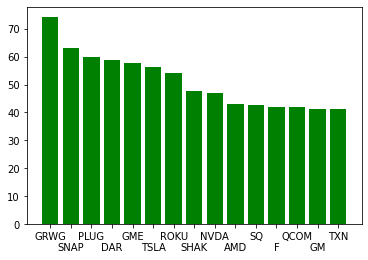

'-- volume_10_day --'

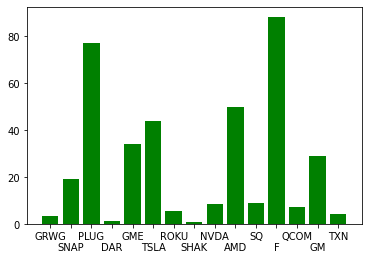

'-- beta --'

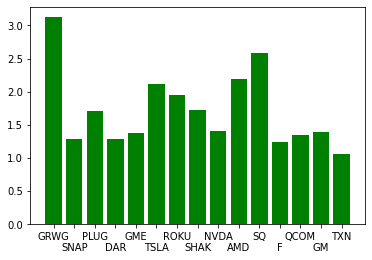

'-- shareOutstanding --'

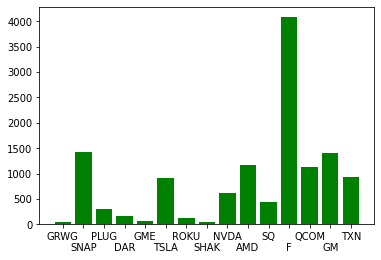

In [8]:
# plot for adx
display("-- adx --")
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["adx"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

display("-- volume_10_day --")
# plot for volume_10_day
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["volume_10_day"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

display("-- beta --")
# plot for beta
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["beta"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

display("-- shareOutstanding --")
# plot for shareOutstanding
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["shareOutstanding"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()